In [1]:
%reload_ext autoreload
%autoreload 2
%run startup.py
from tqdm.auto import tqdm
from itertools import chain
from functools import reduce

from trajectory.planner import Segment, SegmentList, Joint

[3 3] [0.0, 0.0]
CPU times: user 18.3 s, sys: 254 ms, total: 18.6 s
Wall time: 18.4 s


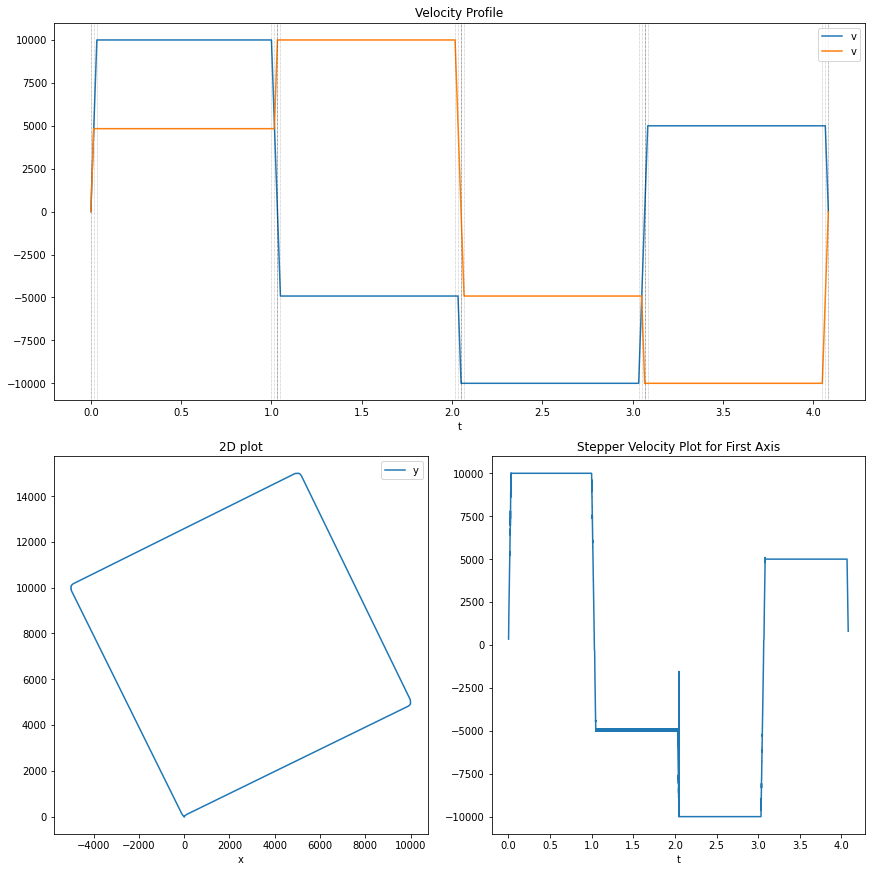

In [10]:
%%time
from trajectory.plot import seg_step 

j = Joint(10_000, 300_000)
joints = [j]*2

sl = SegmentList(joints)  

x = 10000

sl.move([x,x/2])
sl.move([-x/2,x])
sl.move([-x,-x/2])
sl.move([x/2,-x])

df = seg_step(sl)

stepper_plot(sl)
print(sl.step_positions, sl.move_positions)

In [156]:
t = pd.DataFrame(list(sl.stepper(details=True)), columns=['t_', 'x','t','a','v','dc','d','sl'])

In [157]:
j

Joint(v_max=10000, a_max=50000, small_x=1000.0, max_discontinuity=5.0, max_at=0.2, n=0)

In [158]:
sl

1.2001|[0        999↗  8000@9999  ↘999        0] [0        159↗  4000@3999  ↘839     9999]
1.1000|[0       -197↗ -4000@4444  ↘-802    9999] [9999       0↗  9000@9999  ↘999        0]
1.1000|[9999       0↗ -9000@9999  ↘-999       0] [0       -197↗ -4000@4444  ↘-802    9999]
1.1001|[0        249↗  4500@4999  ↘249        0] [9999       0↗ -9000@9999  ↘-999       0]

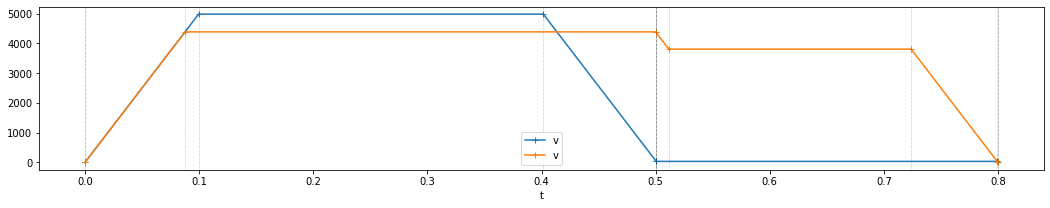

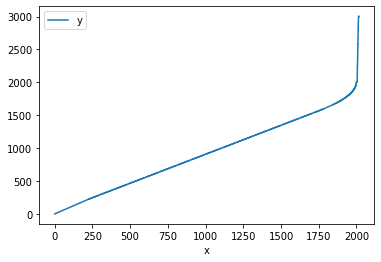

In [8]:


j = Joint(5_000, 50_000)
joints = [j]*2

sl = SegmentList(joints)  
x = 2000
sl.move([x,x])
sl.move([10,1000])

sl.plot()
step_plot(sl)  

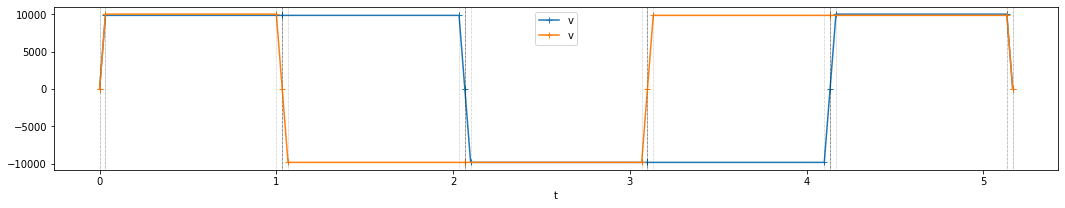

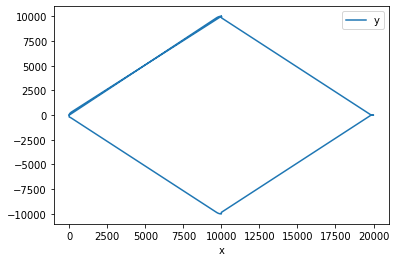

In [133]:
%reload_ext autoreload
%autoreload 2
%run startup.py
from tqdm.auto import tqdm

from trajectory.planner import Segment, SegmentList, Joint

j = Joint(10_000, 300_000)
joints = [j]*2

sl = SegmentList(joints)  
x = 10000

sl.move([x,x])
sl.move([x,-x])
sl.move([-x,-x])
sl.move([-x,x])
sl.move([x,x])
 
sl.plot()
step_plot(sl) 

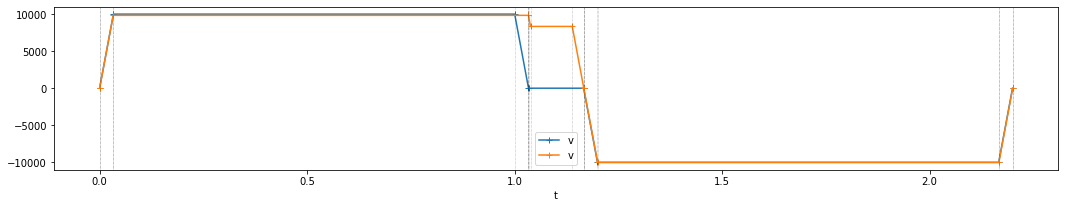

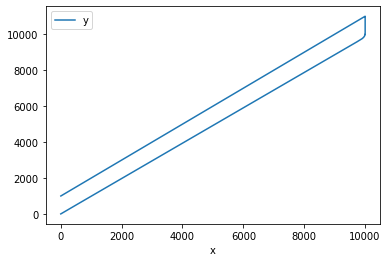

In [132]:
%run startup.py
from tqdm.auto import tqdm

from trajectory.planner import Segment, SegmentList, Joint

j = Joint(10_000, 300_000)
joints = [j]*2

sl = SegmentList(joints)  
x = 10000

sl.move([x,x])
sl.move([1,1000])
sl.move([-x,-x])
 
sl.plot()
step_plot(sl) 

In [36]:
j

Joint(v_max=10000, a_max=500000, small_x=100.0, max_discontinuity=50.0, max_at=0.02, n=0)

## R=1000 N=50 Tmean = 0.043522980392156865

N Discont,0
Replans,"[(4, 47), (2, 2), (0, 1)]"
N Replans,1170
Errors,[]
Reductions,[]


[0, 1000] [  -4 1998]


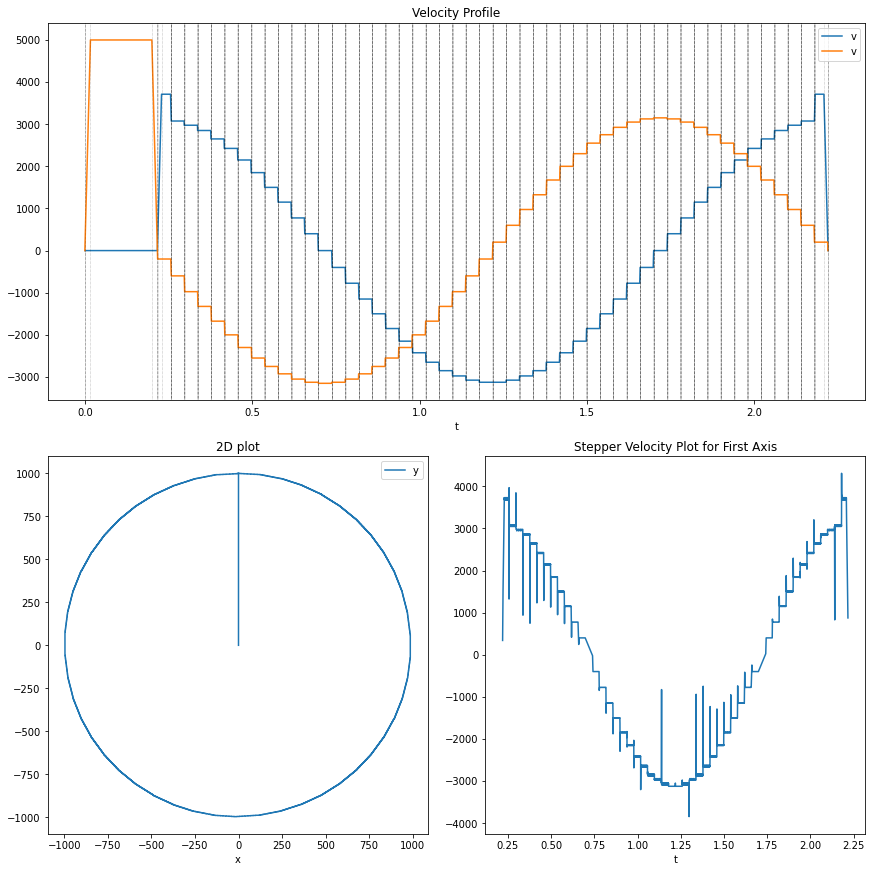

In [32]:
%reload_ext autoreload
%autoreload 2
%run startup.py
from trajectory.plot import  * 
from math import sin, cos, sqrt
from trajectory.planner import Segment, SegmentList, Joint

from trajectory.plot import * 
j = Joint(10_000, 500_000)

def make_circle(r=5000, n=100):
    j = Joint(5_000, 300_000)
    joints = [j]*2

    sl = SegmentList(joints)   
    r = r
    lx  = 0
    ly = 0
    for i in range(0,n+1):
        a = 2*np.pi*(i/n)
        x = sin(a)*r 
        y = cos(a)*r 

        sl.move((round(x-lx),round(y-ly)))
        lx = x
        ly = y
            
    t_m = np.mean(list(chain(*[s.times for s in sl])))
    display(Markdown(f"## R={r} N={n} Tmean = {t_m}"))     

    
    #sl.plot();plt.show()
    #fig, ax = plt.subplots(1,figsize=(12,12))
    stepper_plot(sl)
    report(sl)
    return sl
 
sl = make_circle(1000, 50)
print(sl.move_positions, sl.step_positions)

In [1]:
#
# Calculate velocity profile directly from steps
#
j = Joint(5_000, 50_000)
joints = [j]*2

sl = SegmentList(joints)  

x = 1000

sl.move([x,x/2])
#sl.move([x/2,x])

ax = sl.plot()



step_v_plot(sl)

NameError: name 'Joint' is not defined

In [31]:
df.t.max(), sl.time

(1.131484, 0.300065)

In [99]:
np.log10(100_000)/np.log10(2)

16.609640474436812

In [131]:
from trajectory.stepper import Stepper

s = Stepper(-200, 1000,0, 4)
l  = [e for e in s]
pd.Series(l).describe()

HERE
HERE 2


count    41392.000000
mean        -0.004832
std          0.069344
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.000000
dtype: float64